In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.sans-serif'] = 'stix'
from scipy import integrate

In [2]:
# vec = [x1, y1, z1, vx1, vy1, vz1, x2, y2, z2, vx2, vy2, vz2, x3, y3, z3, vx3, vy3, vz3]
G = 1 
ϵ = 0.0005
def df_3body(vec,t,mass):

    r1=vec[0:3]
    r2=vec[6:9]
    r3=vec[12:15]
    x = np.array([r1[0], r2[0], r3[0]])
    y = np.array([r1[1], r2[1], r3[1]])
    z = np.array([r1[2], r2[2], r3[2]])
    Dx = np.subtract.outer(x,x)
    Dy = np.subtract.outer(y,y)
    Dz = np.subtract.outer(z,z)
    M = mass
    
    #acc = dv/dt    
    bracketx = Dx/((ϵ**2+Dx**2+Dy**2+Dz**2)**(3/2))
    accex = -np.dot(bracketx, M)
    
    brackety = Dy/((ϵ**2+Dx**2+Dy**2+Dz**2)**(3/2))
    accey = -np.dot(brackety, M)
    
    bracketz = Dz/((ϵ**2+Dx**2+Dy**2+Dz**2)**(3/2))
    accez = -np.dot(bracketz, M)    
    # vec = [x1, y1, z1, vx1, vy1, vz1, x2, y2, z2, vx2, vy2, vz2, x3, y3, z3, vx3, vy3, vz3]
    #        0    1   2   3    4    5    6   7   8   9    10   11  12  13  14   15   16   17
    dvec=np.zeros(len(vec))
    dvec[0] =vec[3]
    dvec[1] =vec[4]
    dvec[2] =vec[5]
    dvec[3] =accex[0]
    dvec[4] =accey[0]
    dvec[5] =accez[0]

    dvec[6] =vec[9]
    dvec[7] =vec[10]
    dvec[8] =vec[11]
    dvec[9] =accex[1]
    dvec[10] =accey[1]
    dvec[11] =accez[1]

    dvec[12] =vec[15]
    dvec[13] =vec[16]
    dvec[14] =vec[17]
    dvec[15] =accex[2]
    dvec[16] =accey[2]
    dvec[17] =accez[2]
    
    return dvec

In [11]:
M1 = 1
M2 = 2
M3 = 0
a = 1
mass = np.array([M1,M2,M3])

a1=a*M2/(M1+M2)
a2=a*M1/(M1+M2)
P=2.0*np.pi*np.sqrt(a**3/(G*(M1+M2)))
v1=2.0*np.pi*a1/P
v2=2.0*np.pi*a2/P

body1 = np.array([a1,0,0,0,v1,0])
body2 = np.array([-a2,0,0,0,-v2,0])
body3 = np.array([0,0,0,0,0,0])

v0=np.array([body1, body2, body3]).flatten()
tarr=np.linspace(0.0, P, 1000)
result=integrate.odeint(df_3body,v0,tarr,args=(mass,))
x1=result[0:,0]
y1=result[0:,1]
z1=result[0:,2]
vx1=result[0:,3]
vy1=result[0:,4]
vz1=result[0:,5]

x2=result[0:,6]
y2=result[0:,7]
z2=result[0:,8]
vx2=result[0:,9]
vy2=result[0:,10]
vz2=result[0:,11]

x3=result[0:,12]
y3=result[0:,13]
z3=result[0:,14]
vx3=result[0:,15]
vy3=result[0:,16]
vz3=result[0:,17]

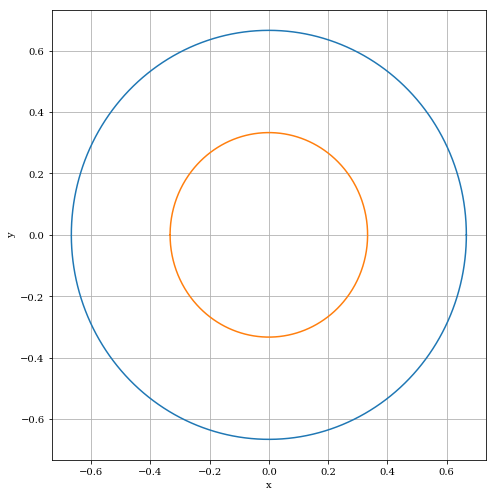

In [12]:
fig, ax = plt.subplots(figsize=(7,7))
ax.set_ylabel('y')
ax.set_xlabel('x')
#ax.set_title()
ax.plot(x1,y1)
ax.plot(x2,y2)
#plt.legend()
plt.grid()
plt.show()

In [5]:
def df_Nbody(v0, t, M, ϵ = 0.0005, G=1):
    Nbody = len(M)
    half = Nbody * 3
    end = Nbody * 6
    pos = v0[0:half]
    velo = v0[half:end]
    
    #pos = v0[0:5]
    #velo = v0[6:11]

    x = np.array(pos[0::3])
    y = np.array(pos[1::3])
    z = np.array(pos[2::3])
    vx = np.array(velo[0::3])
    vy = np.array(velo[1::3])
    vz = np.array(velo[2::3]) 
    
    Dx = np.subtract.outer(x,x)
    Dy = np.subtract.outer(y,y)
    Dz = np.subtract.outer(z,z)
    
    #acc = dv/dt    
    bracketx = Dx/((ϵ**2+Dx**2+Dy**2+Dz**2)**(3/2))
    accex = -np.dot(bracketx, M)
    
    brackety = Dy/((ϵ**2+Dx**2+Dy**2+Dz**2)**(3/2))
    accey = -np.dot(brackety, M)
    
    bracketz = Dz/((ϵ**2+Dx**2+Dy**2+Dz**2)**(3/2))
    accez = -np.dot(bracketz, M)    
    
    dvec = np.zeros(6*Nbody)
    dvec[0::6] = velo[0::3]
    dvec[1::6] = velo[1::3]
    dvec[2::6] = velo[2::3]
    dvec[3::6] = accex[0::1]
    dvec[4::6] = accey[0::1]
    dvec[5::6] = accez[0::1]

    return dvec

In [15]:
#initial conditions, in units where G=1
G = 1 #the function allows this to change
ϵ = 0.0005 #the function allows this to change
M1 = 1
M2 = 2
a = 1 

#kepler's laws
a1=a*M2/(M1+M2)
a2=a*M1/(M1+M2)
P=2.0*np.pi*np.sqrt(a**3/(G*(M1+M2)))
v1=2.0*np.pi*a1/P
v2=2.0*np.pi*a2/P
tarr=np.linspace(0.0, P, 1000)

body1Pos = [a1,0,0] #(x,y,z)
body1Velo = [0,v1,0] #(vx,vy,vz)

body2Pos = [-a2,0,0] #(x,y,z)
body2Velo = [0,-v2,0] #(vx,vy,vz)

mass = np.array([M1,M2])
pos = np.array([body1Pos, body2Pos]).flatten()
velo = np.array([body1Velo, body2Velo]).flatten()
v0 = np.array([pos, velo]).flatten()

result2=integrate.odeint(df_Nbody,v0,tarr,args=(mass,))
x1=result2[0:,0]
y1=result2[0:,1]
z1=result2[0:,2]
vx1=result2[0:,3]
vy1=result2[0:,4]
vz1=result2[0:,5]

x2=result2[0:,6]
y2=result2[0:,7]
z2=result2[0:,8]
vx2=result2[0:,9]
vy2=result2[0:,10]
vz2=result2[0:,11]

In [16]:
#test to make sure that the pos and velo arrays are what they are expected to be
Nbody = len(mass)
half = Nbody * 3
end = Nbody * 6
pos = v0[0:half]    
velo = v0[half:end]
print("pos:", pos)
print("velo:", velo)

pos: [ 0.66666667  0.          0.         -0.33333333  0.          0.        ]
velo: [ 0.          1.15470054  0.          0.         -0.57735027  0.        ]


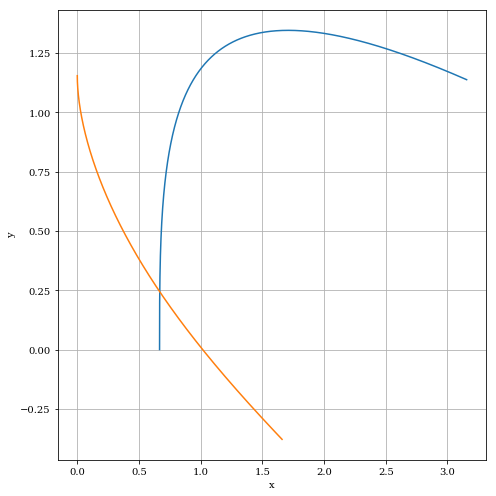

In [17]:
fig2, ax2 = plt.subplots(figsize=(7,7))
ax2.set_ylabel('y')
ax2.set_xlabel('x')
#ax.set_title()
ax2.plot(x1,y1)
ax2.plot(x2,y2)
#plt.legend()
plt.grid()
plt.show()

In [19]:
print(len(result.flatten())) #from 3body function
print(len(result2.flatten())) #from Nbody function
## for some reason these two lengths are different 

18000
12000
